In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

import warnings 

warnings.filterwarnings(action='ignore')

In [100]:
dataset = pd.read_csv("./scaled_dataset.csv")
dataset = dataset.set_index("DEPART_DATE")
dataset = dataset.drop(["AIR_ARRIVE"], axis = 1)
dataset

,FARE_CNT_1,FARE_CNT_2,FARE_CNT_3,FARE_CNT_4,FARE_CNT_5,FARE_CNT_6,FARE_CNT_7,FARE_CNT_8,FARE_CNT_9,FARE_CNT_10,FARE_CNT_11,FARE_CNT_12,FARE_CNT_13,FARE_CNT_14,FARE_AVG_1,FARE_AVG_2,FARE_AVG_3,FARE_AVG_4,FARE_AVG_5,FARE_AVG_6,FARE_AVG_7,FARE_AVG_8,FARE_AVG_9,FARE_AVG_10,FARE_AVG_11,FARE_AVG_12,FARE_AVG_13,FARE_AVG_14,FARE_MIN_1,FARE_MIN_2,FARE_MIN_3,FARE_MIN_4,FARE_MIN_5,FARE_MIN_6,FARE_MIN_7,FARE_MIN_8,FARE_MIN_9,FARE_MIN_10,FARE_MIN_11,FARE_MIN_12,FARE_MIN_13,FARE_MIN_14,FARE_MAX_1,FARE_MAX_2,FARE_MAX_3,FARE_MAX_4,FARE_MAX_5,FARE_MAX_6,FARE_MAX_7,FARE_MAX_8,FARE_MAX_9,FARE_MAX_10,FARE_MAX_11,FARE_MAX_12,FARE_MAX_13,FARE_MAX_14,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HOLIDAY_N,HOLIDAY_Y,PSG_ARRIVE
DEPART_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-15,261.0,277.00,286.00,298.00,304.00,494.00,501.00,308.00,309.0,310.0,308.0,307.0,309.0,307.0,99082.528736,95583.393502,93674.895105,88657.651007,85740.197368,77668.137652,76185.249501,82922.792208,81417.928803,80720.451613,81558.051948,82642.084691,82211.197411,81805.993485,35900.0,29900.0,22000.0,20000.0,20900.0,14900.0,9400.0,16800.0,15900.0,15900.0,16900.0,17100.0,17100.0,14400.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,0,0,0,0,0,1,0,1,0,40794
2022-01-16,276.0,284.00,281.00,297.00,310.00,310.00,519.00,520.00,313.0,313.0,316.0,316.0,318.0,318.0,93041.195652,88798.978873,87757.366548,84626.161616,78322.838710,75561.354839,67394.315992,65738.807692,71235.527157,69733.514377,68352.658228,69676.265823,69548.459119,68481.352201,58900.0,50000.0,45000.0,29000.0,23900.0,21900.0,16800.0,7900.0,16800.0,14900.0,16900.0,14400.0,14900.0,14400.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,0,0,0,0,0,0,1,1,0,42494
2022-01-17,146.0,146.00,175.00,209.00,236.00,257.00,281.00,460.00,468.0,298.0,298.0,300.0,301.0,302.0,75035.342466,75035.342466,71176.628571,74001.483254,73377.203390,69032.607004,66410.106762,60509.391304,59282.927350,62757.483221,61302.785235,60606.466667,60930.232558,60640.264901,25900.0,25900.0,21900.0,21900.0,15900.0,12800.0,11900.0,10400.0,5900.0,10900.0,8800.0,10900.0,9600.0,11100.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,1,0,0,0,0,0,0,1,0,42803
2022-01-18,192.0,209.50,227.00,231.00,254.00,266.00,275.00,279.00,474.0,476.0,282.0,283.0,284.0,284.0,71417.552083,71102.344324,70787.136564,67056.580087,66701.811024,65017.706767,61368.072727,60719.892473,53512.236287,52664.957983,57113.687943,56271.943463,55610.457746,55057.429577,22000.0,20500.0,19000.0,14900.0,11900.0,10900.0,8700.0,7590.0,5900.0,5900.0,5600.0,6900.0,6900.0,6900.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,0,1,0,0,0,0,0,1,0,39383
2022-01-19,203.0,244.00,254.00,264.00,268.00,275.00,282.00,284.00,285.0,489.0,494.0,292.0,293.0,294.0,68348.719212,64762.581967,64268.734165,63774.886364,61551.492537,60935.418182,60320.531915,56492.042254,55271.017544,49787.607362,49641.093117,54815.342466,54000.443686,53016.564626,24600.0,20010.0,19955.0,19900.0,17900.0,14500.0,12900.0,11300.0,9660.0,6900.0,6900.0,7300.0,6210.0,6210.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,0,0,1,0,0,0,0,1,0,39045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,97.0,117.75,138.50,159.25,180.00,191.00,195.00,187.00,200.0,200.0,202.0,205.0,212.0,214.0,87592.783505,85522.518184,83452.252864,81381.987543,79311.722222,78666.387435,78692.256410,76474.919786,77888.650000,77221.100000,77

공휴일 전후3일 변수 추가

In [101]:
lag_periods = 3
for i in range(1, lag_periods+1):
    dataset[f'Holiday_Lag{i}'] = dataset['HOLIDAY_Y'].shift(i)
    
lag_periods = 3
for i in range(1, lag_periods+1):
    dataset[f'Holiday_Lead{i}'] = dataset['HOLIDAY_Y'].shift(-i)

In [102]:
dataset = dataset.dropna()

In [103]:
# Null값 확인 
dataset[dataset.isnull().any(axis=1)]

,FARE_CNT_1,FARE_CNT_2,FARE_CNT_3,FARE_CNT_4,FARE_CNT_5,FARE_CNT_6,FARE_CNT_7,FARE_CNT_8,FARE_CNT_9,FARE_CNT_10,FARE_CNT_11,FARE_CNT_12,FARE_CNT_13,FARE_CNT_14,FARE_AVG_1,FARE_AVG_2,FARE_AVG_3,FARE_AVG_4,FARE_AVG_5,FARE_AVG_6,FARE_AVG_7,FARE_AVG_8,FARE_AVG_9,FARE_AVG_10,FARE_AVG_11,FARE_AVG_12,FARE_AVG_13,FARE_AVG_14,FARE_MIN_1,FARE_MIN_2,FARE_MIN_3,FARE_MIN_4,FARE_MIN_5,FARE_MIN_6,FARE_MIN_7,FARE_MIN_8,FARE_MIN_9,FARE_MIN_10,FARE_MIN_11,FARE_MIN_12,FARE_MIN_13,FARE_MIN_14,FARE_MAX_1,FARE_MAX_2,FARE_MAX_3,FARE_MAX_4,FARE_MAX_5,FARE_MAX_6,FARE_MAX_7,FARE_MAX_8,FARE_MAX_9,FARE_MAX_10,FARE_MAX_11,FARE_MAX_12,FARE_MAX_13,FARE_MAX_14,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HOLIDAY_N,HOLIDAY_Y,PSG_ARRIVE,Holiday_Lag1,Holiday_Lag2,Holiday_Lag3,Holiday_Lead1,Holiday_Lead2,Holiday_Lead3
DEPART_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## 시계열 그림

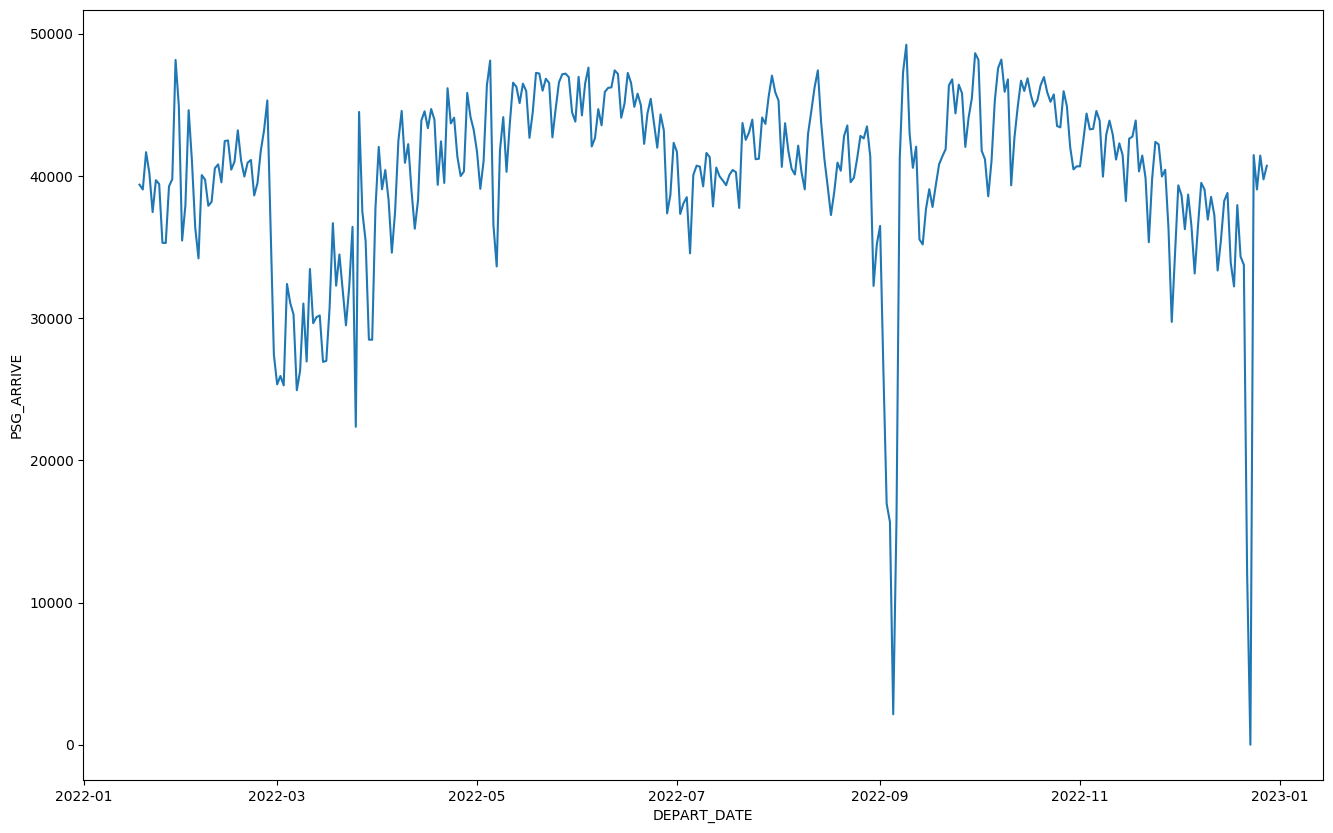

In [104]:
plt.figure(figsize= (16, 10))
tmp = dataset.reset_index()[['DEPART_DATE', 'PSG_ARRIVE']]
tmp['DEPART_DATE'] = pd.to_datetime(tmp['DEPART_DATE'])
sns.lineplot(data = tmp, x = 'DEPART_DATE', y = 'PSG_ARRIVE')

## 반응변수와 상관관계가 높은 상위 5개 변수의 산점도 시각화

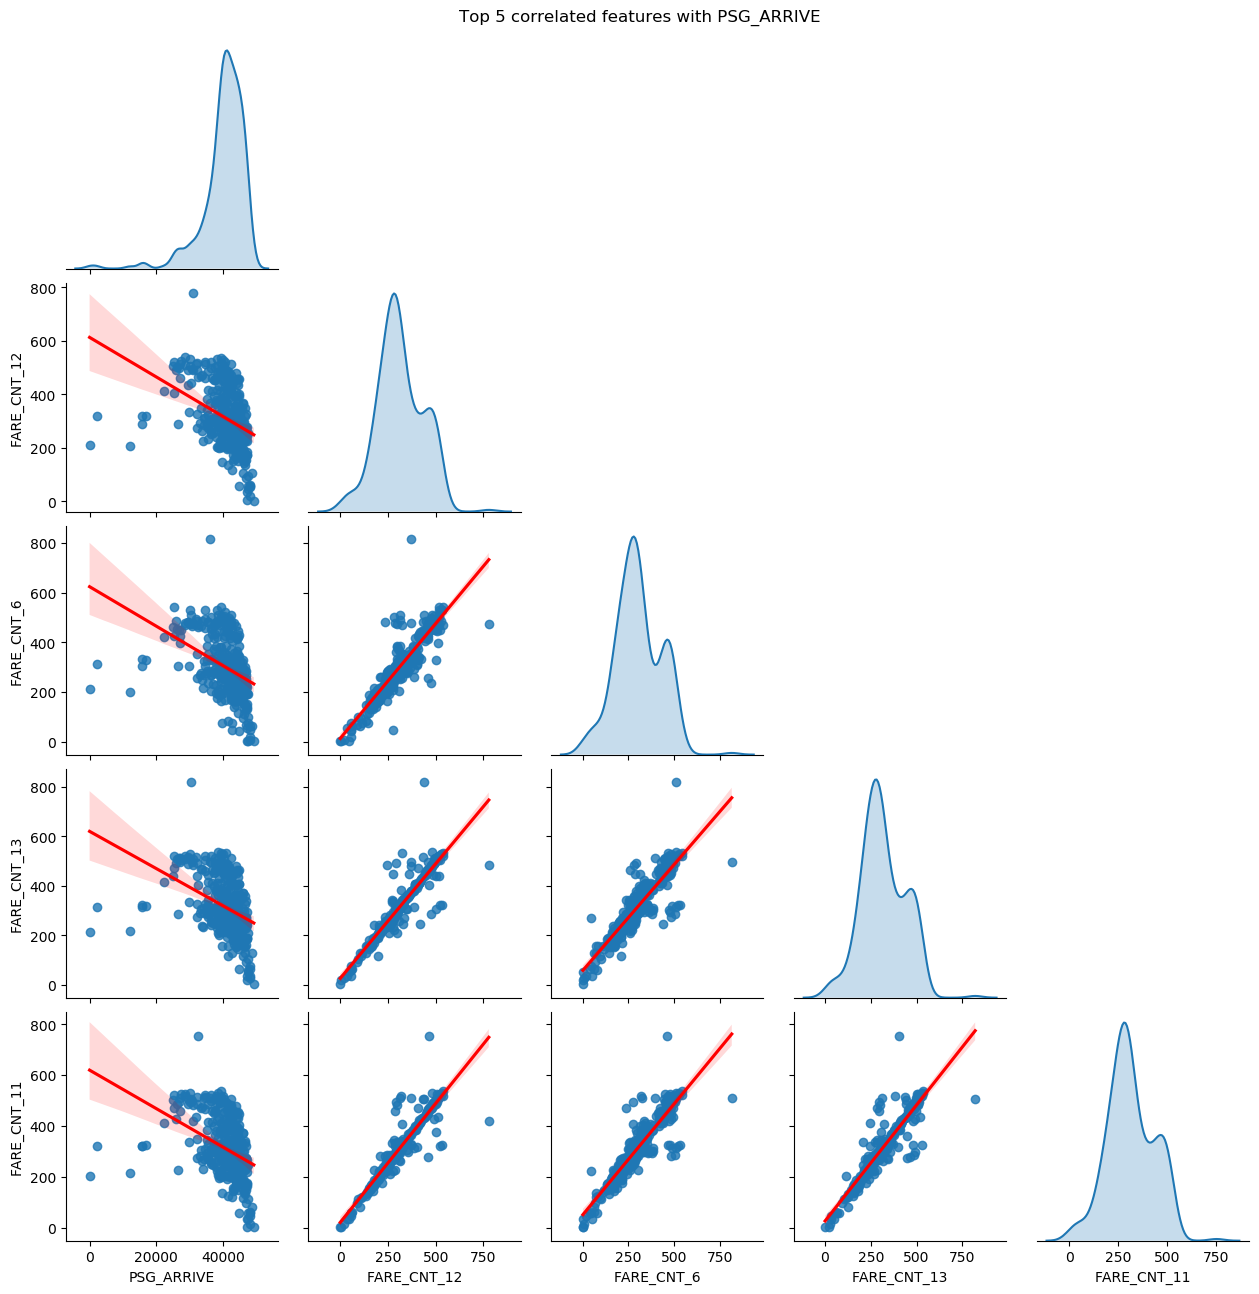

In [105]:
# response 변수와 상관관계가 높은 상위 5개 변수의 산점도 시각화
response_vars = ['PSG_ARRIVE']
top_n = 5

for response_var in response_vars:
    correlated_features = corr_matrix.nlargest(top_n, response_var)[response_var].index
    sns.pairplot(dataset[correlated_features], corner=True, diag_kind="kde", kind="reg", plot_kws={'line_kws':{'color':'red'}})
    plt.suptitle(f'Top {top_n} correlated features with {response_var}', y=1.02)
    plt.show()


위 결과 중 1번째 열의 결과를 통하여 상관관계가 높은 요금 변수와 도착객 수 사이의 산점도를 확인할 수 있다.

이 중 일부 PSG_ARRIVE에 이상치가 존재하는 것으로 판단하여 이를 제거한 후 모델링에 활용하고자 한다.

In [106]:
dataset[dataset['PSG_ARRIVE'] <= 20000]

,FARE_CNT_1,FARE_CNT_2,FARE_CNT_3,FARE_CNT_4,FARE_CNT_5,FARE_CNT_6,FARE_CNT_7,FARE_CNT_8,FARE_CNT_9,FARE_CNT_10,FARE_CNT_11,FARE_CNT_12,FARE_CNT_13,FARE_CNT_14,FARE_AVG_1,FARE_AVG_2,FARE_AVG_3,FARE_AVG_4,FARE_AVG_5,FARE_AVG_6,FARE_AVG_7,FARE_AVG_8,FARE_AVG_9,FARE_AVG_10,FARE_AVG_11,FARE_AVG_12,FARE_AVG_13,FARE_AVG_14,FARE_MIN_1,FARE_MIN_2,FARE_MIN_3,FARE_MIN_4,FARE_MIN_5,FARE_MIN_6,FARE_MIN_7,FARE_MIN_8,FARE_MIN_9,FARE_MIN_10,FARE_MIN_11,FARE_MIN_12,FARE_MIN_13,FARE_MIN_14,FARE_MAX_1,FARE_MAX_2,FARE_MAX_3,FARE_MAX_4,FARE_MAX_5,FARE_MAX_6,FARE_MAX_7,FARE_MAX_8,FARE_MAX_9,FARE_MAX_10,FARE_MAX_11,FARE_MAX_12,FARE_MAX_13,FARE_MAX_14,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HOLIDAY_N,HOLIDAY_Y,PSG_ARRIVE,Holiday_Lag1,Holiday_Lag2,Holiday_Lag3,Holiday_Lead1,Holiday_Lead2,Holiday_Lead3
DEPART_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-09-03,342.0,350.000000,349.000000,318.0,329.0,330.0,330.0,331.0,292.0,322.0,323.0,317.0,320.0,317.0,74603.801170,74747.314286,77117.191977,79039.559748,81974.954407,82528.303030,82782.424242,83646.465257,83583.150685,87448.819876,88177.770898,91047.381703,90408.875000,90955.205047,5000.0,5000.000000,5900.000000,6900.0,6900.0,7900.0,6900.0,7900.0,8480.0,8900.0,8900.0,8900.0,8500.0,9500.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,177000.0,0,0,0,0,0,1,0,1,0,16954,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-04,336.0,346.000000,334.000000,341.0,329.0,331.0,317.0,330.0,329.0,316.0,322.0,317.0,322.0,287.0,65126.041667,64411.445087,63673.832335,64139.589443,63308.601824,65430.302115,63731.892744,65341.545455,65505.501520,67954.462025,69205.434783,69809.148265,72676.739130,74714.390244,4000.0,4000.000000,4900.000000,5900.0,5900.0,5700.0,6400.0,6900.0,6900.0,6900.0,7900.0,7900.0,8000.0,8000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,160000.0,0,0,0,0,0,0,1,1,0,15654,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-05,278.0,277.000000,322.000000,307.0,316.0,313.0,314.0,304.0,317.0,315.0,319.0,318.0,314.0,299.0,58336.690647,58182.671480,57515.155280,58298.501629,58585.886076,58216.741214,59031.337580,59317.039474,58672.618297,59189.015873,60347.335423,60301.257862,62284.012739,61698.093645,4000.0,4000.000000,2760.000000,4000.0,4000.0,4000.0,3800.0,3900.0,3900.0,3900.0,3900.0,3900.0,3900.0,4900.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,1,0,0,0,0,0,0,1,0,2142,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-06,221.0,248.333333,275.666667,303.0,304.0,304.0,319.0,319.0,319.0,319.0,319.0,290.0,315.0,316.0,58441.628959,58204.507315,57967.385671,57730.264026,57387.894737,58129.868421,58957.617555,58922.821317,59005.956113,59053.918495,59371.661442,50510.137931,60221.746032,60770.000000,4900.0,5433.333333,5966.666667,6500.0,6500.0,4900.0,4900.0,5760.0,5760.0,7900.0,7900.0,3900.0,8640.0,3900.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,0,1,0,0,0,0,0,1,0,15821,0.0,0.0,0.0,0.0,0.0,1.0
2022-12-22,206.0,207.000000,206.000000,205.0,199.0,201.0,204.0,210.0,211.0,211.0,214.0,207.0,218.0,208.0,77313.737864,79161.980676,80048.349515,80092.487805,78773.919598,78889.353234,77784.901961,77876.380952,77152.606635,77076.492891,77349.906542,75410.917874,76635.045872,76287.211538,37900.0,45900.000000,49900.000000,49900.0,49900.0,51840.0,49900.0,47900.0,47900.0,48900.0,48900.0,45900.0,45400.0,45400.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,146000.0,0,0,0,1,0,0,0,1,0,12035,0.0,0.0,0.0,0.0,0.0,1.0
2022-12-23,249.0,231.000000,225.000000,219.0,217.0,212.0,213.0,211.0,212.0,203.0,202.0,209.0,212.0,211.0,85109.718876,91747.099567,94776.711111,98077.168950,97176.497696,99848.773585,103596.807512,105832.037915,108572.264151,109177.438424,110976.138614,110960.574163,

In [107]:
dataset = dataset[dataset['PSG_ARRIVE'] > 20000]

## FARE_AVG(1~14일전) 와의 도착객수 상관관계

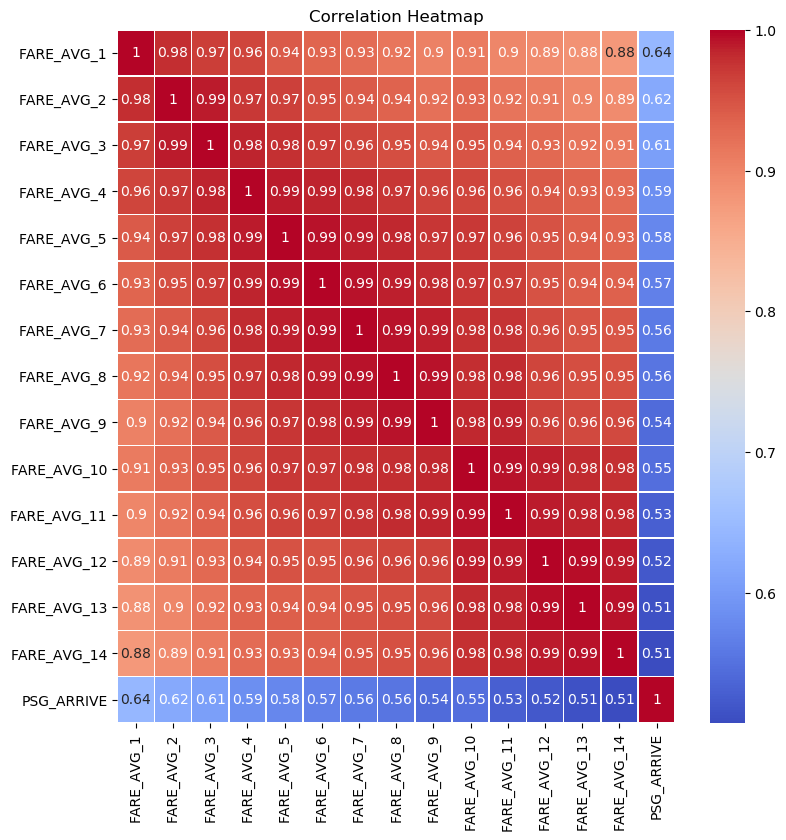

In [108]:
# 상관계수 행렬 계산
corr_matrix = dataset[[x for x in dataset.columns if x.__contains__('FARE_AVG')] + ['PSG_ARRIVE']].corr()

# 상관계수 히트맵 시각화
plt.figure(figsize=(9, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## FARE_CNT(1~14일전) 와의 도착객수 상관관계

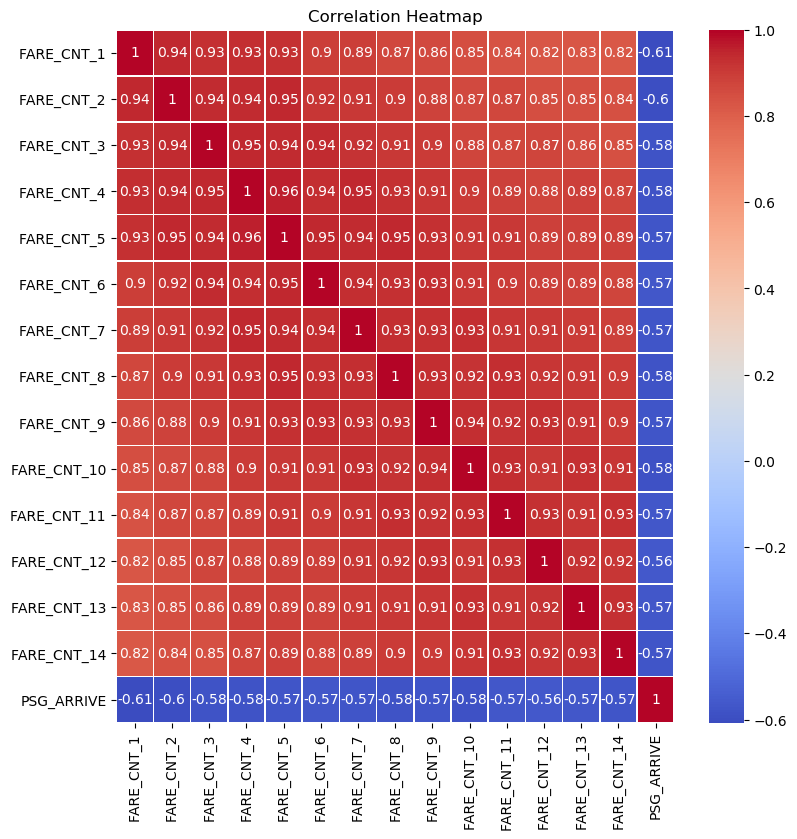

In [109]:
# 상관계수 행렬 계산
corr_matrix = dataset[[x for x in dataset.columns if x.__contains__('FARE_CNT')] + ['PSG_ARRIVE']].corr()

# 상관계수 히트맵 시각화
plt.figure(figsize=(9, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

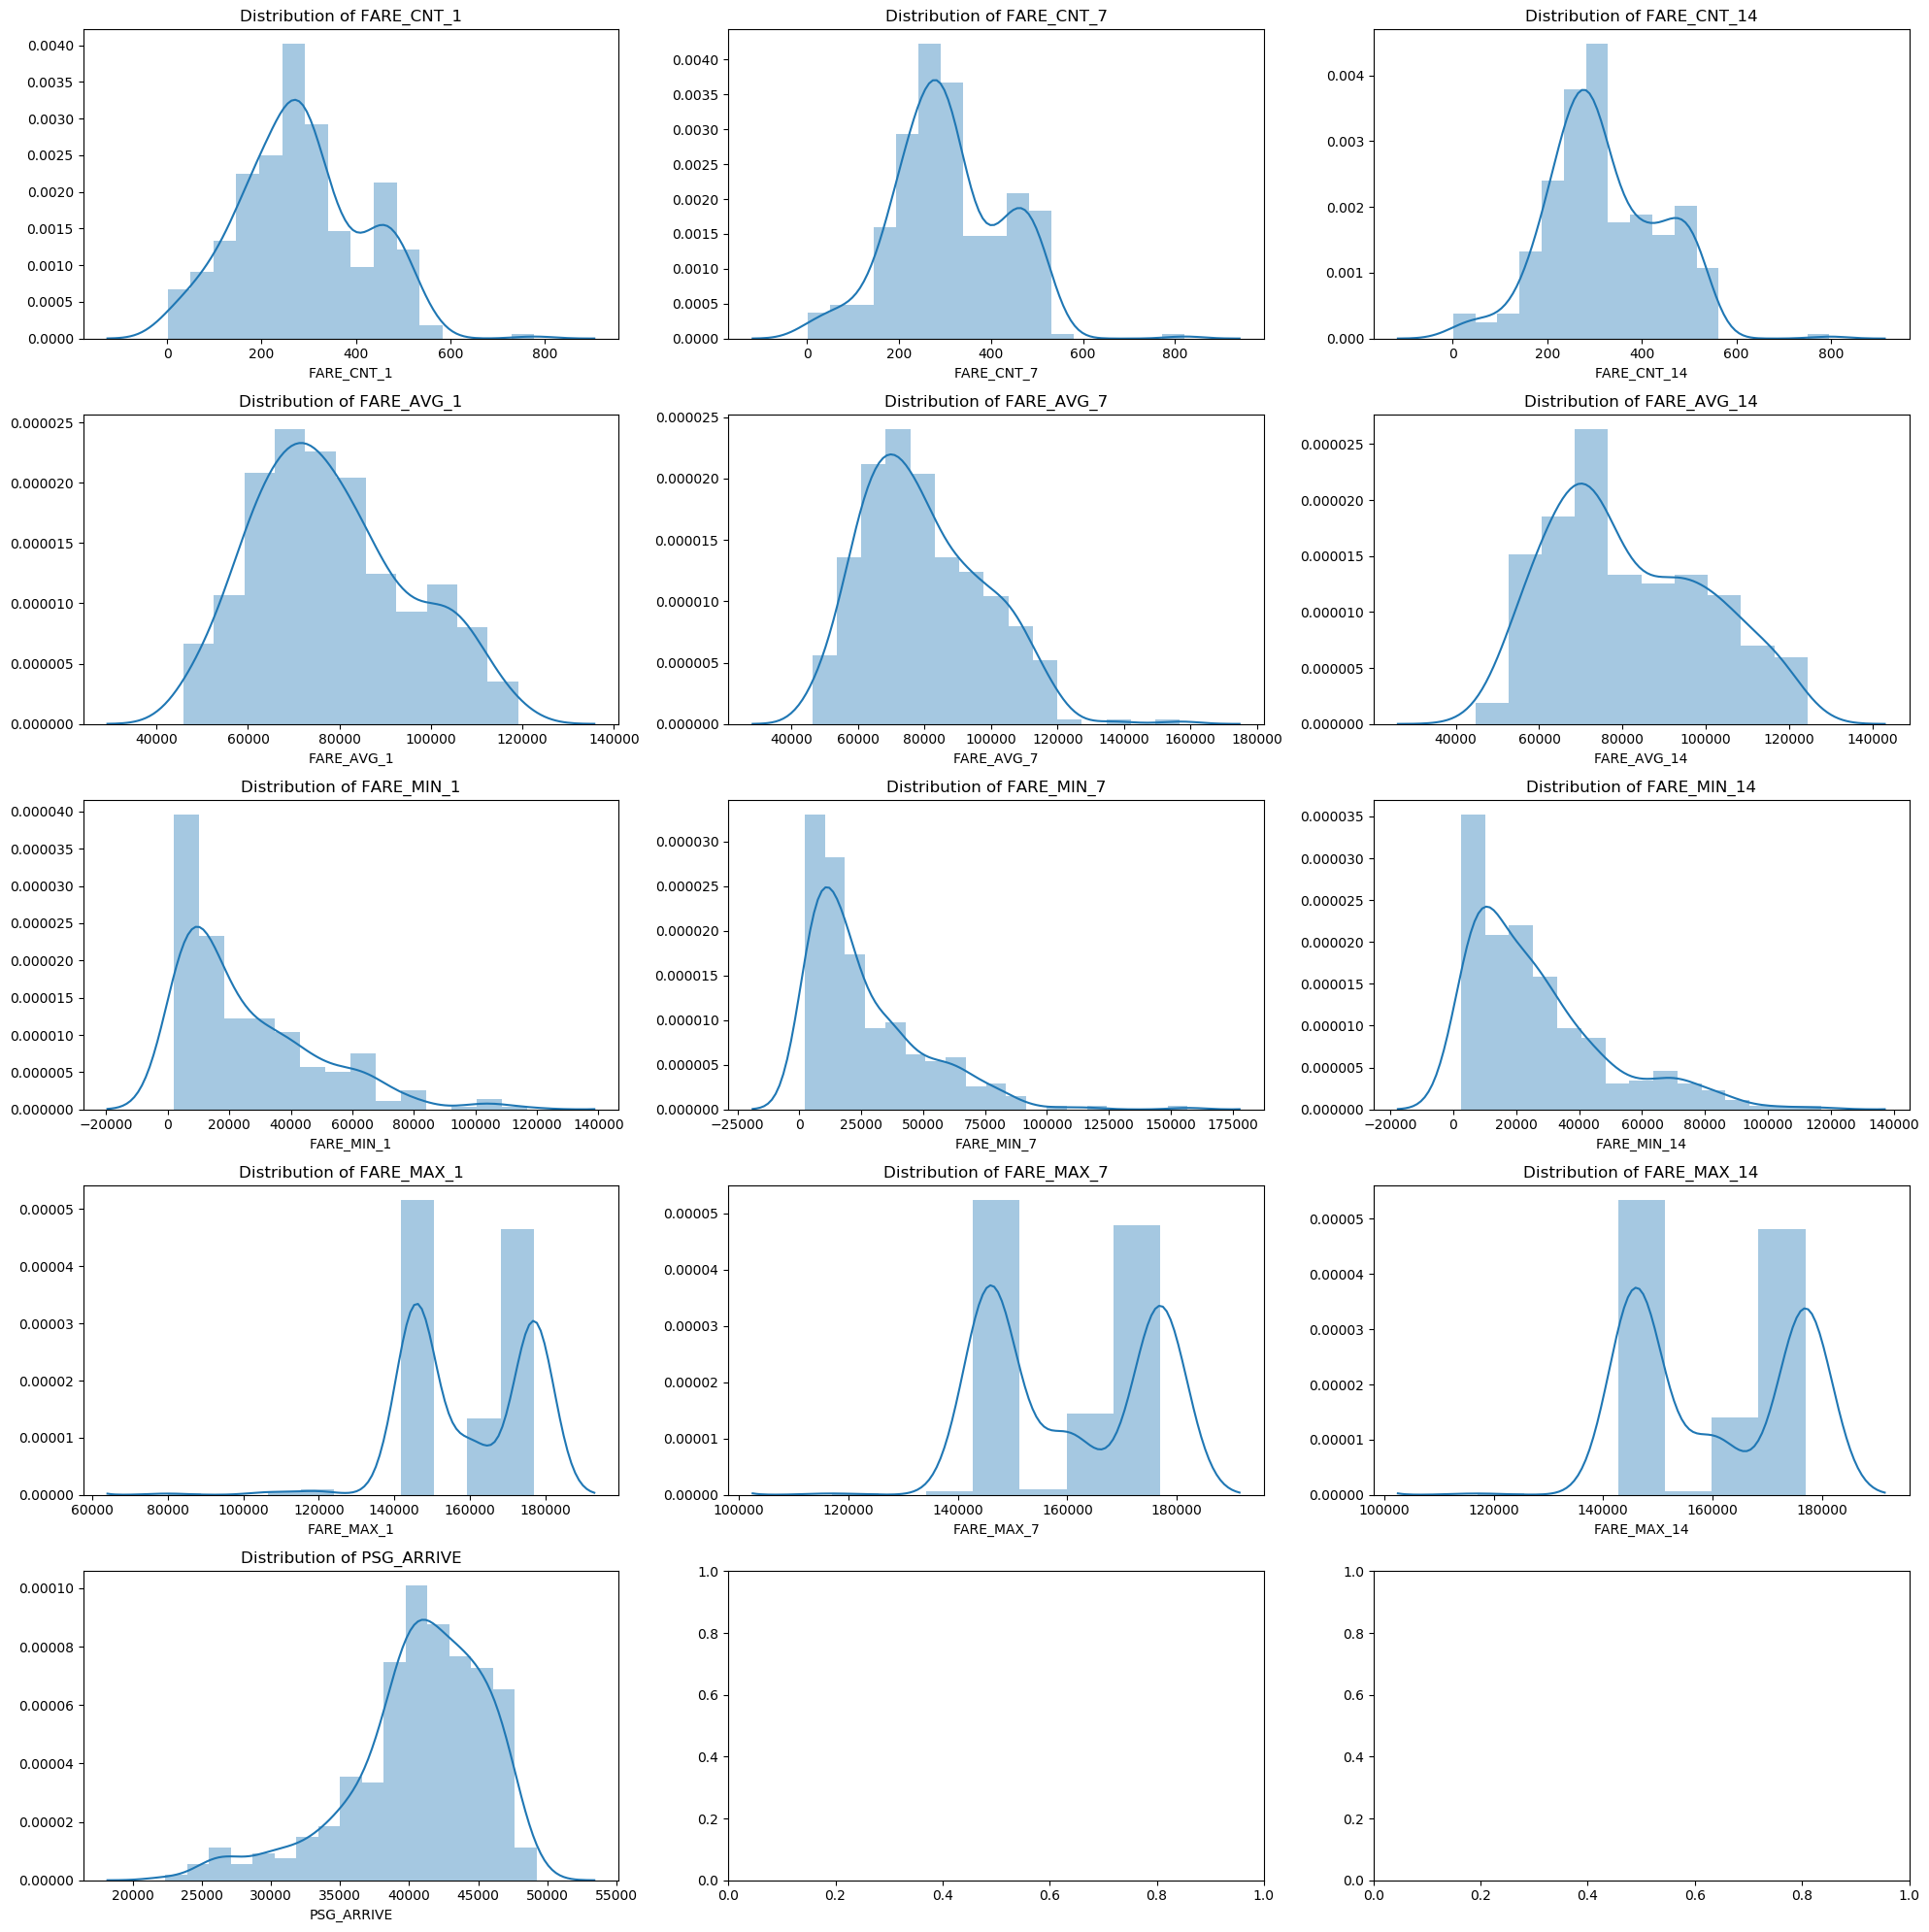

In [110]:
# 각 변수의 분포 시각화
fig, axes = plt.subplots(5, 3, figsize=(20, 20))
axes = axes.ravel()

col_list = ['FARE_CNT_1', 'FARE_CNT_7', 'FARE_CNT_14',
            'FARE_AVG_1', 'FARE_AVG_7', 'FARE_AVG_14',
            'FARE_MIN_1', 'FARE_MIN_7', 'FARE_MIN_14',
            'FARE_MAX_1', 'FARE_MAX_7', 'FARE_MAX_14', 'PSG_ARRIVE']
            #'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 
            #'HOLIDAY_N', 'HOLIDAY_Y', 'PSG_ARRIVE']

for i, col in enumerate(col_list):
    sns.distplot(dataset[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [120]:
# 데이터 전처리
train_data = dataset.iloc[:200, :]
test_data = dataset.iloc[200:, :]

X_train = train_data.drop(columns = ['PSG_ARRIVE'])
y_train = train_data[['PSG_ARRIVE']]

X_test = test_data.drop(columns = ['PSG_ARRIVE'])

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.decomposition import PCA

# PCA 적용
pca = PCA(n_components=0.95)  # 설명된 분산의 95%를 유지하도록 설정
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 회귀 모델 및 하이퍼파라미터 그리드 정의
models = {
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 5, 10],
            'random_state': [42]
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6, 10],
            'random_state': [42]
        }
    },
    'LGBMRegressor': {
        'model': LGBMRegressor(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6, 10],
            'num_leaves' : [2**3, 2**6, 2**10],
            'random_state': [42]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'rbf'],
            'C': [0.1, 1, 10]
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7]
        }
    }
}

위 5가지 모델을 MSE 성능을 통하여 비교하여 최적의 모델을 각각 설정합니다. 이 과정에서 시간 순서로 20000개의 데이터는 학습용 데이터에 사용되었고, 나머지 데이터는 테스트 데이터로 활용됩니다. 처음에는 정규화 작업을 통하여 데이터를 변환합니다.

In [125]:
# 모델 최적화 및 예측
mse_list = []
predictions_list = []

model_list = []
mse_result_list = []
best_mse = float('inf')
best_model = None
best_predictions = None
pred_res = []
for name, model in models.items():
    grid_search = GridSearchCV(model['model'], model['params'], scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train_pca, y_train)
    print(f"{name} (response {i+1}): Best params: {grid_search.best_params_}")
    model_list.append(grid_search.best_params_)
    mse_result_list.append(-grid_search.best_score_)
    
    train_pred = grid_search.predict(X_train_pca)
    test_pred = grid_search.predict(X_test_pca)
    pred = np.concatenate((train_pred, test_pred))
    mse = -grid_search.best_score_
    pred_res.append(pred)
    if mse < best_mse:
        best_mse = mse
        best_model = grid_search.best_estimator_
        best_predictions = best_model.predict(X_test_pca)

mse_list.append(best_mse)
predictions_list.append(best_predictions)  
    
# 결과 저장
predictions_df = pd.DataFrame(np.array(predictions_list).T, columns=['response1'])
# predictions_df.to_csv('predictions.csv', index=False)

# 평가(RMSE)
print('RMSE:', np.sqrt(mse_list))

RandomForestRegressor (response 13): Best params: {'max_depth': None, 'n_estimators': 100, 'random_state': 42}
XGBRegressor (response 13): Best params: {'max_depth': 6, 'n_estimators': 200, 'random_state': 42}
LGBMRegressor (response 13): Best params: {'max_depth': 6, 'n_estimators': 100, 'num_leaves': 8, 'random_state': 42}
SVR (response 13): Best params: {'C': 10, 'kernel': 'linear'}
KNeighborsRegressor (response 13): Best params: {'n_neighbors': 7}
RMSE: [4999.33208637]


## RMSE 평가지표 비교 

반응변수에 대한 RMSE 평가지표는 위와 같습니다. 이는 7개의 모델을 비교하여 설정한 최적의 모델의 결과입니다.

In [122]:
metric_df = pd.DataFrame({'model' : ['RF', 'XGB', 'LGB', 'SVR', 'KNN', 'LSTM', 'GRU'], 
                          'rmse' : list(np.sqrt(mse_result_list)) + [7746.21, 7071.03]})

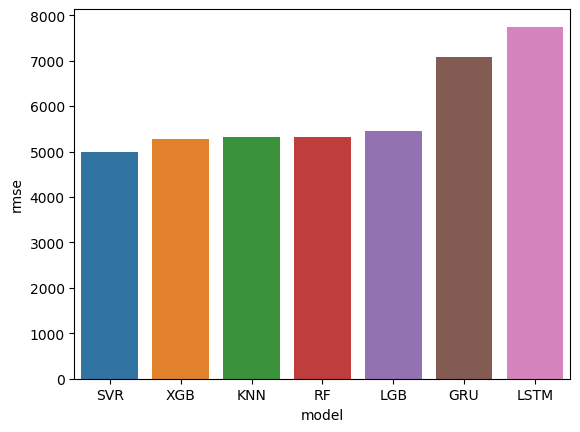

In [123]:
sns.barplot(data = metric_df.sort_values('rmse'), x = 'model', y = 'rmse')

In [144]:
metric_df.sort_values('rmse')

,model,rmse
3,SVR,4999.332086
1,XGB,5272.770348
4,KNN,5311.907171
0,RF,5315.843043
2,LGB,5446.911530
6,GRU,7071.030000
5,LSTM,7746.210000


In [126]:
import joblib

gru = joblib.load('pred_gru')

lstm = joblib.load('pred_lstm')
pred_res.append(gru)
pred_res.append(lstm)

In [167]:
# 'RF', 'XGB', 'LGB', 'SVR', 'KNN', 'LSTM', 'GRU'
pred_df = pd.DataFrame({'RF' : pred_res[0].tolist()[1:321], 'XGB' : pred_res[1].tolist()[1:321], 
                        'LGB' : pred_res[2].tolist()[1:321], 'SVR' : pred_res[3].tolist()[1:321], 
                        'KNN' : pred_res[4].reshape(-1, ).tolist()[1:321],
                        'LSTM' : pred_res[5].reshape(-1, ).tolist()[1:321], 
                        'GRU' : pred_res[6].reshape(-1, ).tolist()[1:321]})

pred_df['Real'] = dataset['PSG_ARRIVE'].tolist()[1:321]
pred_df.index = dataset.index.tolist()[1:321]

In [175]:
pred_df_long

,index,variable,value,Date
0,2022-01-19,RF,39389.66,2022-01-19
1,2022-01-20,RF,42174.36,2022-01-20
2,2022-01-21,RF,42110.58,2022-01-21
3,2022-01-22,RF,39656.70,2022-01-22
4,2022-01-23,RF,40651.55,2022-01-23
...,...,...,...,...
2555,2022-12-04,Real,38689.00,2022-12-04
2556,2022-12-05,Real,36489.00,2022-12-05
2557,2022-12-06,Real,33137.00,2022-12-06
2558,2022-12-07,Real,36459.00,2022-12-07


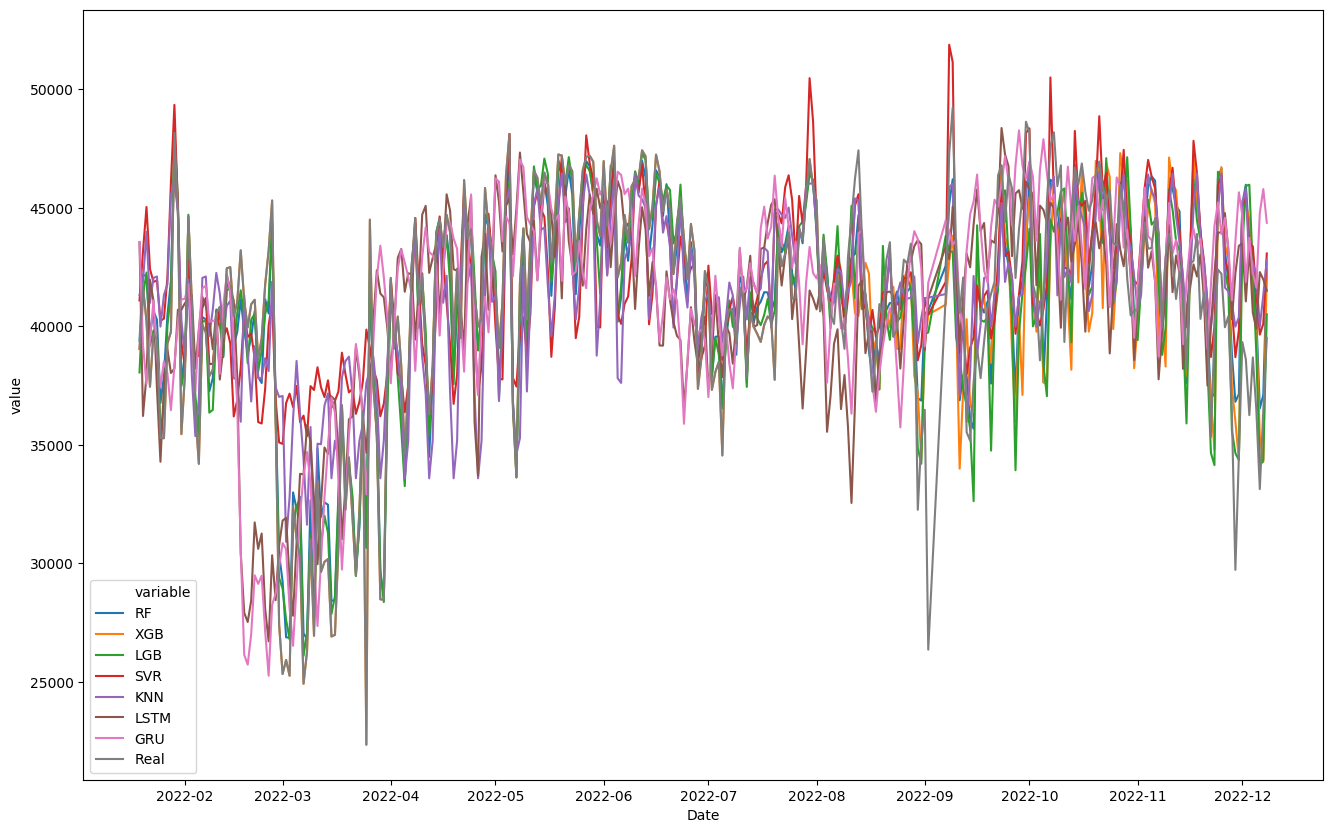

In [173]:
plt.figure(figsize = (16, 10))
pred_df_long = pd.melt(pred_df, ignore_index = False).reset_index()
pred_df_long['Date'] = pd.to_datetime(pred_df_long['index'])
sns.lineplot(data = pred_df_long, x = 'Date', y = 'value', hue = 'variable')